In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import copy

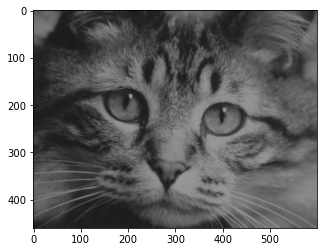

In [2]:
#Question4
img4_I = cv2.imread('./Cat.png', 0)
#img4_I = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.imshow(img4_I, 'gray', vmin=0, vmax=255)

<BarContainer object of 256 artists>

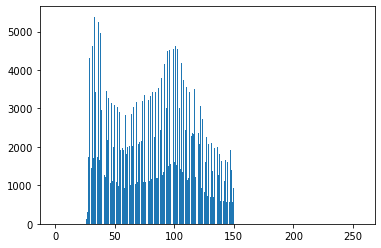

In [3]:
#Intensity Histogram
row, col = img4_I.shape

gray_level_4 = [0 for x in range(0, 256)]
for r in range(row):
    for c in range(col):
        gray_level_4[img4_I[r,c]] += 1
        
plt.bar(x=range(0,256), height = gray_level_4)

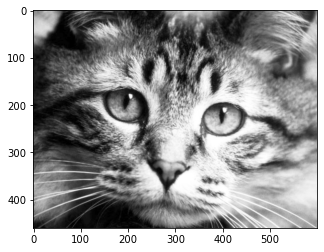

In [4]:
pixel_number = img4_I.size
p = [0 for x in range (0, 256)]
for i in range(0, 256):
    p[i] = gray_level_4[i] / pixel_number

c_p = [0 for x in range(0, 256)]
c_p[0] = p[0]
for i in range(1, 256):
    c_p[i] = c_p[i-1] + p[i]
    
new_img_4 = copy.deepcopy(img4_I)
for r in range(row):
    for c in range(col):
        index = int(img4_I[r, c])
        new_img_4[r,c] = 255* c_p[index]
        
plt.imshow(new_img_4, 'gray', vmin=0, vmax=255)

<BarContainer object of 256 artists>

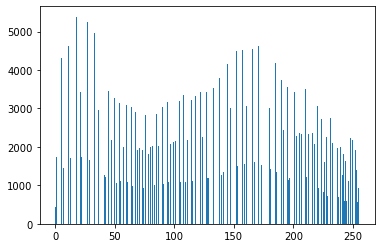

In [5]:
row, col = new_img_4.shape

gray_level_new_4 = [0 for x in range(0, 256)]
for r in range(row):
    for c in range(col):
        gray_level_new_4[new_img_4[r,c]] += 1
        
plt.bar(x=range(0,256), height = gray_level_new_4)

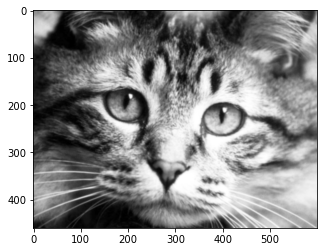

In [6]:
##GaussianBlur，L
gaussian_img4_L = cv2.GaussianBlur(new_img_4, (3,3), 1)
plt.imshow(gaussian_img4_L, 'gray')

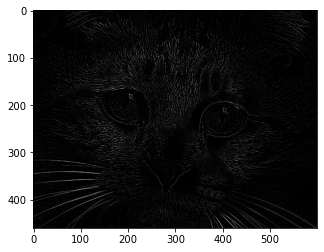

In [7]:
# H = I - L
mask_H = cv2.subtract(new_img_4, gaussian_img4_L)
plt.imshow(mask_H, 'gray')

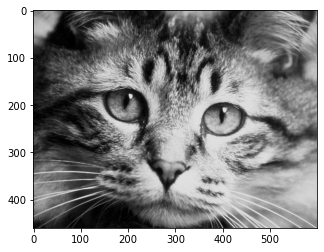

In [8]:
# O = I + a * H
a = 1.25
output_img4_O = (new_img_4 + a * mask_H) / 255
plt.imshow(output_img4_O, 'gray')

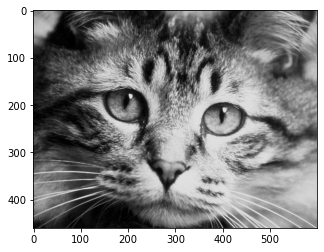

In [11]:
#Contrast Stretching
a, b = 0., 255.
c, d = np.min(output_img4_O), np.max(output_img4_O)
result = (output_img4_O - c) * ((b - a) / (d - c)) + a
plt.imshow(result, 'gray')
plt.savefig('result.png')